# Autoregressive Model 

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [20]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## Simulate an AR(2) Process 

$
y_t = 1 + 0.33y_{t-1} + 0.5y_{t-2}
$

In [3]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [4]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

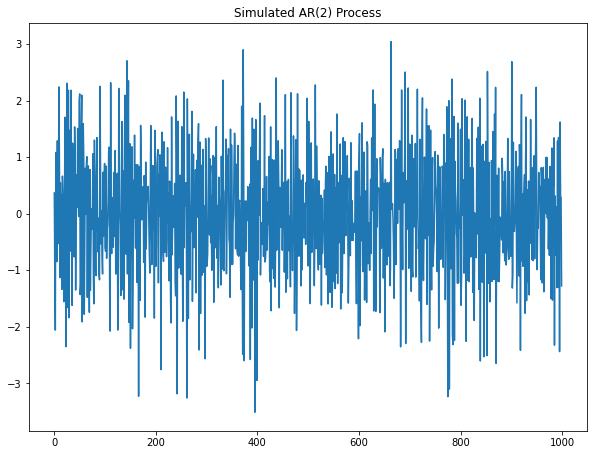

In [5]:
plt.plot(AR2_process)
plt.title("Simulated AR(2) Process")
plt.show()

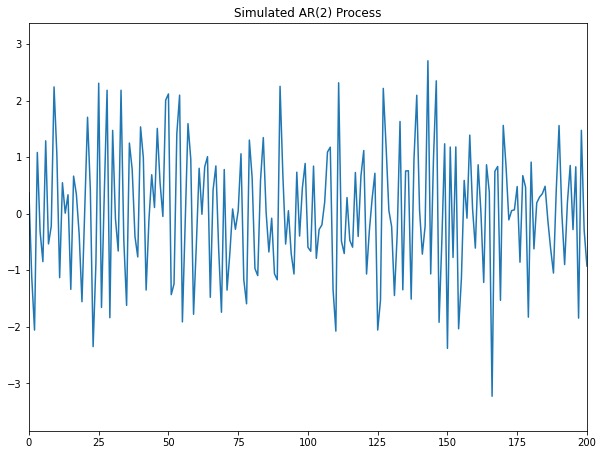

In [6]:
plt.plot(AR2_process)
plt.title("Simulated AR(2) Process")
plt.xlim(0, 200)
plt.show()

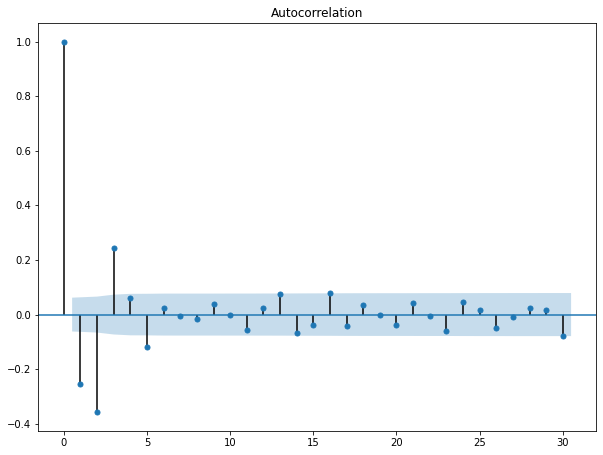

In [8]:
plot_acf(AR2_process);

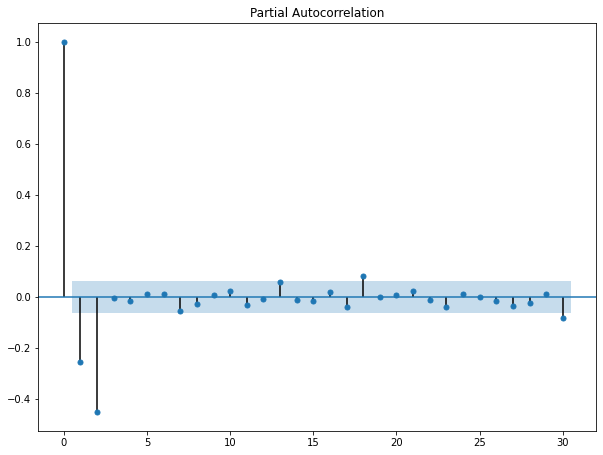

In [9]:
plot_pacf(AR2_process);

In [10]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.3688709  0.45165389]
sigma: 0.9453772967395675


## Simulate an AR(3) Process 

$
y_t = 1 + 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3}
$

In [11]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [12]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

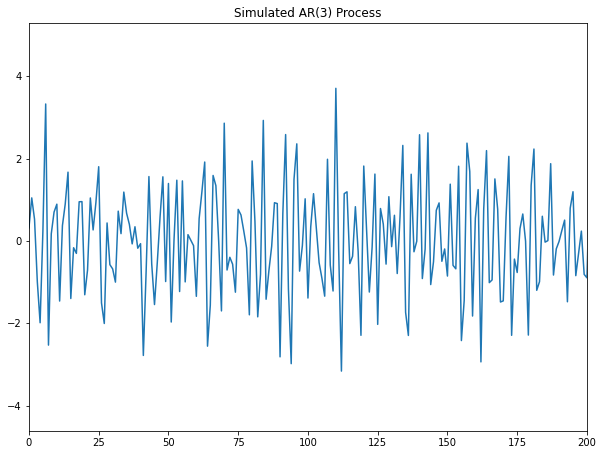

In [14]:
plt.plot(AR3_process)
plt.title("Simulated AR(3) Process")
plt.xlim(0, 200)
plt.show()

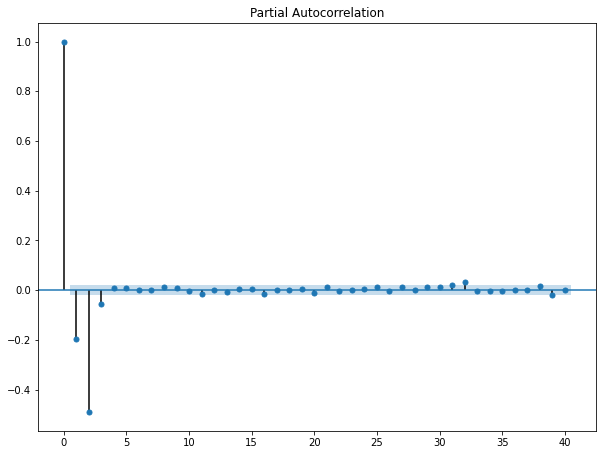

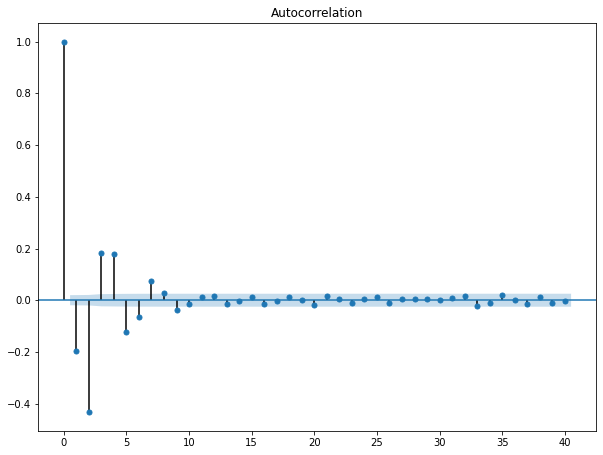

In [15]:
plot_pacf(AR3_process);
plot_acf(AR3_process);

In [16]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.32003767 0.507048   0.05516278]
sigma: 1.0013881938592977


## Mini Project: Model Johnson&Johnson Quarterly Earnings per Share 

In [18]:
data = pd.read_csv('jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


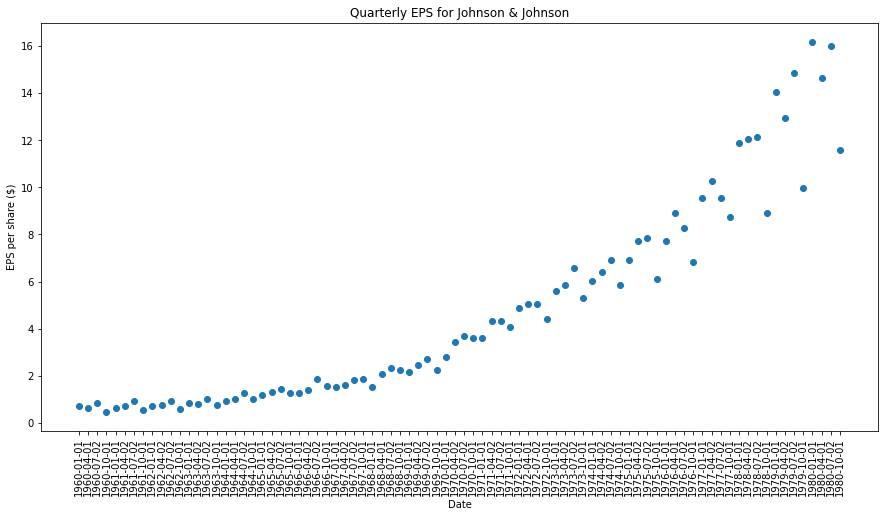

In [22]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Take the log difference to make data stationary

data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


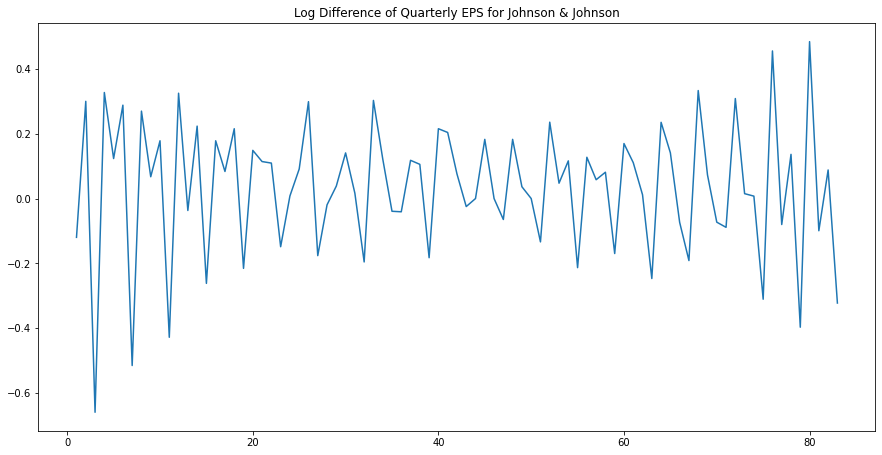

In [24]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

In [25]:
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -15.71829809036813
p-value: 1.333488891344276e-28


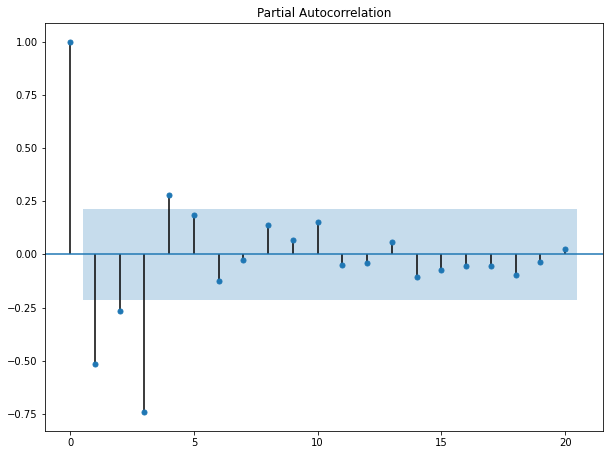

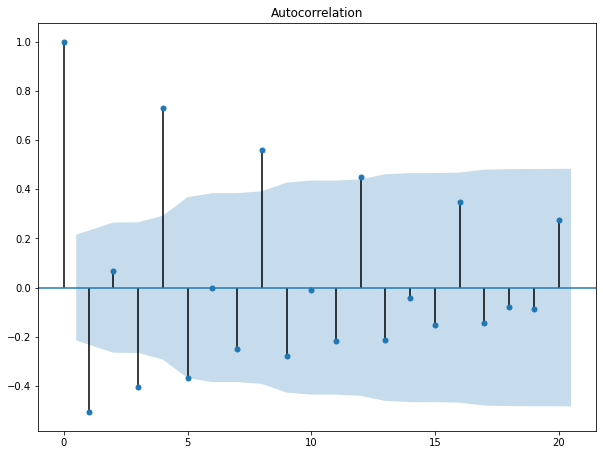

In [26]:
plot_pacf(data['data']);
plot_acf(data['data']);

In [27]:
# Try a AR(4) model
rho, sigma = yule_walker(data['data'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175
